In [ ]:
from google.colab import files
uploaded = files.upload()

#IMPORTING LIBRARIES

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline



/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df = pd.read_csv('NIPS_1987-2015.csv')
#used to read csv files and perform operations on it

df.head()

,Unnamed: 0,1987_1,1987_2,1987_3,1987_4,1987_5,1987_6,1987_7,1987_8,1987_9,1987_10,1987_11,1987_12,1987_13,1987_14,1987_15,1987_16,1987_17,1987_18,1987_19,1987_20,1987_21,1987_22,1987_23,1987_24,1987_25,1987_26,1987_27,1987_28,1987_29,1987_30,1987_31,1987_32,1987_33,1987_34,1987_35,1987_36,1987_37,1987_38,1987_39,...,2015_364,2015_365,2015_366,2015_367,2015_368,2015_369,2015_370,2015_371,2015_372,2015_373,2015_374,2015_375,2015_376,2015_377,2015_378,2015_379,2015_380,2015_381,2015_382,2015_383,2015_384,2015_385,2015_386,2015_387,2015_388,2015_389,2015_390,2015_391,2015_392,2015_393,2015_394,2015_395,2015_396,2015_397,2015_398,2015_399,2015_400,2015_401,2015_402,2015_403
0,abalone,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,abbeel,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,abbott,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,abbreviate,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,abbreviated,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


#HANDLING CATEGORICAL DATA

In [ ]:
terms=df['Unnamed: 0'].tolist()
docs=df.columns.values.tolist()
del docs[0]

In [ ]:
df.drop(df.columns[[0]], axis=1, inplace=True)
df.head()

,1987_1,1987_2,1987_3,1987_4,1987_5,1987_6,1987_7,1987_8,1987_9,1987_10,1987_11,1987_12,1987_13,1987_14,1987_15,1987_16,1987_17,1987_18,1987_19,1987_20,1987_21,1987_22,1987_23,1987_24,1987_25,1987_26,1987_27,1987_28,1987_29,1987_30,1987_31,1987_32,1987_33,1987_34,1987_35,1987_36,1987_37,1987_38,1987_39,1987_40,...,2015_364,2015_365,2015_366,2015_367,2015_368,2015_369,2015_370,2015_371,2015_372,2015_373,2015_374,2015_375,2015_376,2015_377,2015_378,2015_379,2015_380,2015_381,2015_382,2015_383,2015_384,2015_385,2015_386,2015_387,2015_388,2015_389,2015_390,2015_391,2015_392,2015_393,2015_394,2015_395,2015_396,2015_397,2015_398,2015_399,2015_400,2015_401,2015_402,2015_403
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
import pandas as pd 
from sklearn.preprocessing import LabelEncoder
x = df.iloc[:, :-1].values 
y = df.iloc[:, -1].values 
labelencoder_X1 = LabelEncoder()
x[:,0] = labelencoder_X1.fit_transform(x[:,0])
x[:,1] = labelencoder_X1.fit_transform(x[:,1])
print(x)
#Here we are using LabelEncoder

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


#SPLITTING OF DATA INTO TRAINING AND TEST

In [ ]:
from sklearn.model_selection import train_test_split

#import model selection train test split for splitting the data into test and train for model validation.

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=101)


#NORMALIZING DATA

In [ ]:
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler

# fit scaler on training data
norm = MinMaxScaler().fit(x_train)

# transform training data
X_train_norm = norm.transform(x_train)

# transform testing data
X_test_norm = norm.transform(x_test)

print(X_train_norm)
print(X_test_norm)

[[0.     0.     0.     ... 0.     0.     0.    ]
 [0.     0.     0.     ... 0.     0.     0.0625]
 [0.     0.     0.     ... 0.     0.     0.    ]
 ...
 [0.     0.     0.     ... 0.     0.     0.    ]
 [0.     0.     0.     ... 0.     0.     0.    ]
 [0.     0.     0.     ... 0.     0.     0.    ]]
[[0.06666667 0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


#GRAPHS

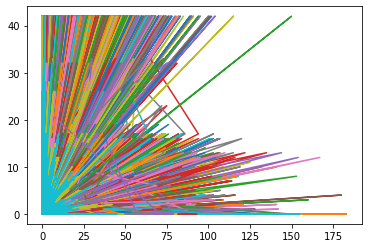

In [ ]:
import matplotlib.pyplot as plt 

plt.plot(x, y) 
 

plt.show() 


#ALGORITHM

In [ ]:
from sklearn.cluster import KMeans
num_clusters = 5
km = KMeans(n_clusters=num_clusters)


#FITTING OF TRAINING DATA

In [ ]:
km.fit(x_train,y_train)
#training or fitting the train data into the model

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

#PREDICTIONS FOR OUR PROBLEM STATEMENT WITH THE RELATED GRAPHS

In [ ]:
predictions = km.predict(x_test)

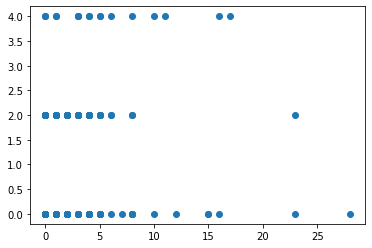

In [ ]:
plt.scatter(y_test,predictions)

#EVALUATION

In [ ]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 1.9587876144788487
MSE: 4.592891408634976
RMSE: 2.1431032193142205


In [ ]:
print(metrics.accuracy_score(y_test, predictions))

#SAVING THE MODEL USING PICKLE LIBRARY

In [ ]:
import pickle 

# Save the trained model as a pickle string. 
saved_model = pickle.dumps(km) 

# Load the pickled model 
lm_from_pickle = pickle.loads(saved_model) 

# Use the loaded pickled model to make predictions 
lm_from_pickle.predict(x_test) 


array([2, 2, 2, ..., 2, 2, 2], dtype=int32)

#ACCURACY w.r.t TRAINED DATA

Confusion Matrix


In [ ]:
from sklearn.metrics import confusion_matrix
y_train = y_train[0:4586]
results =confusion_matrix(y_train, predictions)
print(results)

[[ 179    0 4117    0   16    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0]
 [   4    0  130    0    1    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0]
 [   1    0   39    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0]
 [   2    0   32    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0]
 [   0    0   16    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0]
 [   0    0    9    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0]
 [   1    0    5    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0]
 [   1    0    3    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0]
 [   0    0    6    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0]
 [   0    0    4    0    0    0    0    0    0    0    

Precision, Recall, Support, Fscore

In [ ]:
import numpy
from sklearn.metrics import precision_recall_fscore_support

precision_recall_fscore_support(y_train, predictions, average='macro')

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(0.048051486836290166, 0.050825602968460115, 0.004859931136746337, None)

#ACCURACY w.r.t TEST DATA

Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix

results =confusion_matrix(y_test, predictions)
print(results)

[[  92    0 4200    0    2    0    0    0    0    0    0    0    0    0
     0    0    0]
 [  42    0  117    0    2    0    0    0    0    0    0    0    0    0
     0    0    0]
 [  23    0   40    0    0    0    0    0    0    0    0    0    0    0
     0    0    0]
 [   5    0    6    0    3    0    0    0    0    0    0    0    0    0
     0    0    0]
 [   7    0    8    0    2    0    0    0    0    0    0    0    0    0
     0    0    0]
 [   6    0    5    0    2    0    0    0    0    0    0    0    0    0
     0    0    0]
 [   1    0    2    0    1    0    0    0    0    0    0    0    0    0
     0    0    0]
 [   1    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0]
 [   4    0    2    0    1    0    0    0    0    0    0    0    0    0
     0    0    0]
 [   1    0    0    0    1    0    0    0    0    0    0    0    0    0
     0    0    0]
 [   0    0    0    0    1    0    0    0    0    0    0    0    0    0
     0    0    0]
 [   1    

Precision, Recall, Support, Fscore

In [ ]:
import numpy
from sklearn.metrics import precision_recall_fscore_support

precision_recall_fscore_support(y_test, predictions, average='macro')

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(0.03624347626417765, 0.04552899636890657, 0.010394232958683093, None)